<a href="https://colab.research.google.com/github/swati0715/Customer-Classification/blob/main/Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
# Sat random seed for reproducibility
np.random.seed(42)
# Number of customers
n_customers = 500
# Generate synthetic features
ages = np.random.randint (18, 70, n_customers)
genders = np.random.randint(0, 2, n_customers) # 0: Female, 1: Male
income = np.random.normal(50, 15, n_customers) .round(2) # Mean: 50k, Std: 15k
purchase_freq = np.random.poisson(3, n_customers) # Avg 3 purchases/month
# Simulate churn: likely to churn if income < 40 and purchase_freq < 3
churn = ((income < 40) & (purchase_freq < 3)).astype(int)
# Create DataFrame
df_customers = pd.DataFrame({
'Age': ages,
'Genders': genders,
'Income': income,
'PurchaseFrequency': purchase_freq,
'Churn': churn
})

In [3]:
#Save to csv
df_customers.to_csv("customers.csv",index=False)

print("Customer data created and saved to 'customers.csv'")
print(df_customers.head())

Customer data created and saved to 'customers.csv'
   Age  Genders  Income  PurchaseFrequency  Churn
0   56        1   24.45                  2      1
1   69        0   49.17                  2      0
2   46        0   55.76                  4      0
3   32        1   49.51                  4      0
4   60        0   18.99                  1      1


In [4]:
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv("customers.csv")
# Show top rows
df.head()

,Age,Genders,Income,PurchaseFrequency,Churn
0,56,1,24.45,2,1
1,69,0,49.17,2,0
2,46,0,55.76,4,0
3,32,1,49.51,4,0
4,60,0,18.99,1,1


In [5]:
#Data info and check for nulls
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    int64  
 1   Genders            500 non-null    int64  
 2   Income             500 non-null    float64
 3   PurchaseFrequency  500 non-null    int64  
 4   Churn              500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Genders,0
Income,0
PurchaseFrequency,0
Churn,0


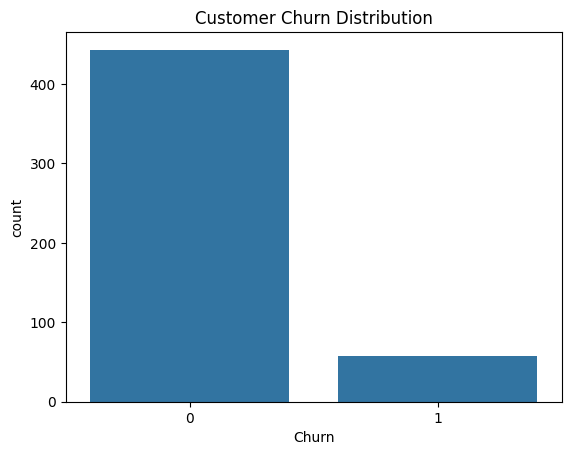

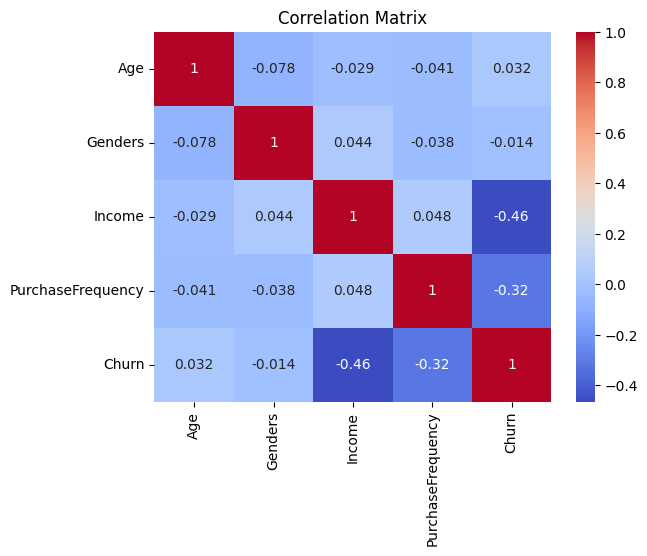

In [6]:
# Churn distribution
sns.countplot (data=df, x='Churn' )
plt.title ( "Customer Churn Distribution")
plt.show()
# Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title ("Correlation Matrix")
plt.show()

In [7]:
X = df.drop("Churn", axis=1)
y = df [ "Churn" ]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy Score: 0.91
Confusion Matrix:
 [[85  2]
 [ 7  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



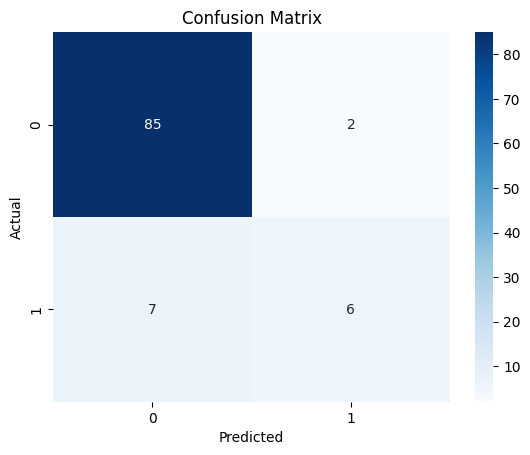

In [8]:
# Predict
y_pred = model.predict(X_test)
# Accuracy
print ("Accuracy Score:", accuracy_score(y_test, y_pred) )
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Classification report
print("Classification Report: \n", classification_report (y_test, y_pred) )
# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel ("Predicted")
plt.ylabel ("Actual" )
plt. show()

In [10]:
new_customer = pd.DataFrame({
    'Age': [28],
    'Genders': [1],  # Changed 'Gender' to 'Genders' to match training data
    'Income': [37],
    'PurchaseFrequency': [2]
})
prediction = model.predict(new_customer)
if prediction[0] == 1:
    print("The customer is likely to CHURN. Consider offering retention benefits.")
else:
    print("The customer is likely to STAY. Continue engagement as usual.")

The customer is likely to STAY. Continue engagement as usual.
